Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [2]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    #set best to minus infinity
    best = float("-inf")
    # counter for hires 
    hires = 0
    # interview every apllicant
    for i in applicants:
        # if i is better than the current best hire i and update best  
        if i > best:
            best = i
            hires += 1
    return hires
    raise NotImplementedError()
    

In [3]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [4]:
#import package
import random

#define function that receives the number of applicants as input and returns the average number of assistants hired
def experimental_hires(N):
    
    # make list of all candidates 
    a = [*range(N)]
    # counter for hires
    n = 0
    #repeat experiemnt 1000 times
    for i in range(1000):
        # shuffle list randomly
        random.shuffle(a)
        # count number of hires
        n +=hire_assistant(a)
    
    #return average number of hires
    return n/1000
        
    
    raise NotImplementedError()

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [5]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

In [6]:
#define important lists
a_hires = []
e_hires = []
applicants = []

#gather data
for i in range(100):
    e = experimental_hires(i)
    e_hires.append(e)
    a = analytical_hires(i)
    a_hires.append(a)
    applicants.append(i)

    
import matplotlib.pyplot as plt
#plot functions
plt.plot(applicants,e_hires, label="experimental estimation hires")
plt.plot(applicants,a_hires, label="analytical estimation hires")
plt.legend()
plt.xlabel("number of applicants")
plt.ylabel("average number of hires")
plt.title("number of hiers from number of applicants")
plt.show()
#raise NotImplementedError()

<Figure size 640x480 with 1 Axes>

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

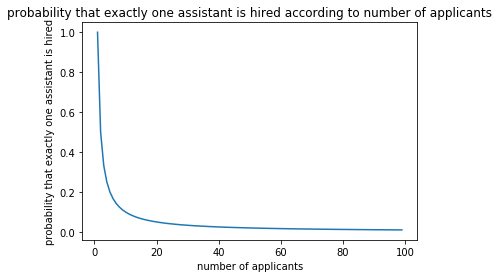

In [7]:
#define lists
p_1_hire = []
applicants = []

#gather data
for i in range(1,100,1):
    p_1 = 1/i
    p_1_hire.append(p_1)
    applicants.append(i)

    
import matplotlib.pyplot as plt
#plot graph
plt.plot(applicants,p_1_hire)
plt.xlabel("number of applicants")
plt.ylabel("probability that exactly one assistant is hired")
plt.title("probability that exactly one assistant is hired according to number of applicants")
plt.show()
#raise NotImplementedError()
#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [8]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

If we want to find an experimental answer to the question, we need a random sample because the hats' distribution is random, and we have to simulate them. This is similar to the assistant problem. If we want to find a mathematical answer, we do not need a random sample. 

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 is the right wat to implement a list with integers from 0 to n in random order. The others do not work because random.sample returns floats, and randomly does not have an attribute integers

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [12]:
import numpy as np

#define function
def hat_check(n):
    #create list for people
    hat_list = list(range(n))
    #count correct hats
    correct_hats = 0
    
    #repeat experiment 1000 times
    for i in range(1000):
        #randomize list
        np.random.shuffle(hat_list) 
        for i in range(n):
            #check if hat is still at right position and update counter
            if i == hat_list[i]:
                correct_hats += 1
    #return average 
    av = correct_hats/1000
    return av
                

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

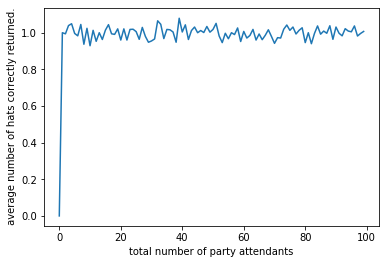

In [13]:
import matplotlib.pyplot as plt

#define lists
h_c = []
p_a = []

#gather data
for i in range(100):
    c = hat_check(i)
    h_c.append(c)
    p_a.append(i)
    

#plot graph
plt.plot(p_a,h_c)
plt.xlabel("total number of party attendants")
plt.ylabel(" average number of hats correctly returned.")
plt.show()
#raise NotImplementedError()
#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?


Every person has the probability of 1/n to get his hat. Because we have n persons, we would predict that $n* 1/n = 1$ person get the right hat. We see that this is independent of N. Therefore, we have a uniform distribution. f(x) = 1 for all integers x>0. For x = 0 we get f(x)= 0 because no hats can be returned correctly without hats. We can see that our empirical distribution matches our theoretical predictions with small errors.

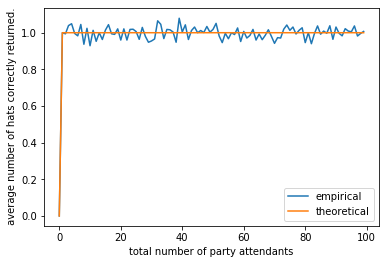

In [14]:
#create analytical data
th = [0]
for i in range(99):
    th.append(1)
    
#plot graphs
plt.plot(p_a,h_c, label="empirical")
plt.plot(p_a,th, label="theoretical")
plt.legend()
plt.xlabel("total number of party attendants")
plt.ylabel(" average number of hats correctly returned.")
plt.show()